---

# Actividad Modulo 2

---

## Importamos librerias necesarias

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_classification

from NNMultiClass import NNMultiClass

%matplotlib inline

---

## Data Creation

In [2]:
data = make_classification(
    n_classes=2,
    n_features=4,
    n_samples=1000,
    random_state=42
)

X = data[0]
y = data[1]

In [3]:
data = make_classification(
    n_classes=2,
    n_features=4,
    n_samples=1000,
    random_state=42
)

X = data[0]
y = data[1]

---

### Train-Test Split

In [4]:
test_percentage = 0.2

X_train = X[:-int(test_percentage * X.shape[0])]
y_train = y[:-int(test_percentage * y.shape[0])]

X_test = X[-int(test_percentage * X.shape[0]):]
y_test = y[-int(test_percentage * y.shape[0]):]

---

## Neural Network Configuration

In [5]:
input_size = X_test.shape[1]
output_size = len(np.unique(y))
layers = 8

layer_sizes = [input_size] + [layers] + [output_size]

nn = NNMultiClass(layer_sizes=layer_sizes, hidden_activation="a", seed=42, lr=3e-1)
nn.show_weights()
y_pred = nn.predict(X_test)


Pesos capa 0 (4 → 8):
[[ 0.15235854 -0.51999205  0.3752256   0.47028236 -0.97551759 -0.65108975
   0.0639202  -0.1581213 ]
 [-0.00840058 -0.42652196  0.43969899  0.38889597  0.03301535  0.5636206
   0.23375467 -0.42964623]
 [ 0.18437539 -0.4794413   0.43922515 -0.02496296 -0.09243118 -0.34046477
   0.61127067 -0.07726474]
 [-0.21416391 -0.17606678  0.26615459  0.18272203  0.20636631  0.2154105
   1.0708238  -0.20320751]]

Pesos capa 1 (8 → 2):
[[-0.18110515 -0.28771211]
 [ 0.21778161  0.39915198]
 [-0.04028651 -0.29704017]
 [-0.29149813  0.23001929]
 [ 0.26278003  0.19203403]
 [-0.23529321  0.08208142]
 [ 0.04125466  0.07731809]
 [ 0.3080966   0.07905296]]


---

## Pre - Backpropagation Prediction

---

### Confusion Matrix

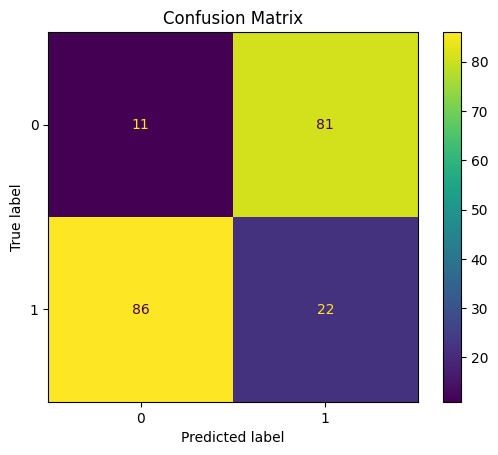

In [6]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.12      0.12        92
           1       0.21      0.20      0.21       108

    accuracy                           0.17       200
   macro avg       0.16      0.16      0.16       200
weighted avg       0.17      0.17      0.17       200



---

## Post - Backpropagation Prediction

In [8]:
nn.fit(X_train, y_train, epochs=10000, verbose=True)
nn.show_weights()
y_pred_back = nn.predict(X_test)

Epoch    1 | loss=0.4457 | acc=0.8562
Epoch 1000 | loss=0.1853 | acc=0.9263
Epoch 2000 | loss=0.1839 | acc=0.9287
Epoch 3000 | loss=0.1767 | acc=0.9313
Epoch 4000 | loss=0.1768 | acc=0.9337
Epoch 5000 | loss=0.1756 | acc=0.9350
Epoch 6000 | loss=0.1753 | acc=0.9300
Epoch 7000 | loss=0.1757 | acc=0.9337
Epoch 8000 | loss=0.1761 | acc=0.9325
Epoch 9000 | loss=0.1752 | acc=0.9350
Epoch 10000 | loss=0.1791 | acc=0.9287

Pesos capa 0 (4 → 8):
[[ -0.03964178  -4.00466263   8.93668166   0.27364352  -7.73295188
   -0.70969741 -10.02025129  -1.17083607]
 [ -0.91926051   1.03623631   0.38754077  -0.17385738   1.31230202
    1.01735634   2.67161797  -0.35434817]
 [  2.44348232  -0.56178977  -7.44464609   1.4436997    3.3033815
   -1.32162797   4.47159706   0.6974695 ]
 [ -1.38601205   0.54491793   2.82275743  -0.5651545   -0.29852429
    0.75194455   0.96354103  -0.42114624]]

Pesos capa 1 (8 → 2):
[[-1.23858537  0.76976811]
 [-0.43325293  1.05018653]
 [ 0.91771425 -1.25504093]
 [-1.29749944  1.2

---

### Confusion Matrix

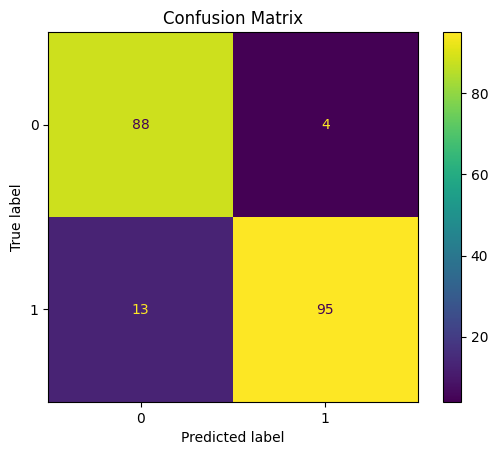

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_back)
plt.title("Confusion Matrix")
plt.show()

---

### Classification Report

In [10]:
print(classification_report(y_test, y_pred_back))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        92
           1       0.96      0.88      0.92       108

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



---